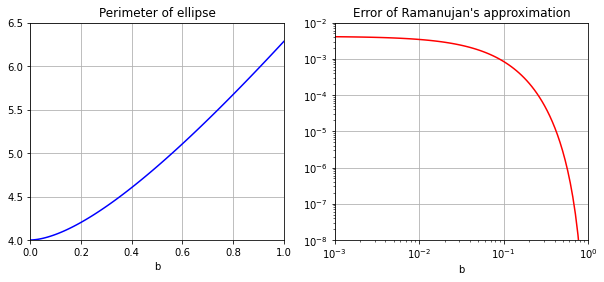

In [61]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate

b_lin = np.linspace(0,1,100)
b_log = np.logspace(-3,0,100)
perim = np.zeros(100)
error = np.zeros(100)

def integrand(x,b):
    return np.sqrt(1-(1-b**2)*\
           np.sin(x)**2)

def Ramanujan(b):
    return np.pi*(3*(1+b) - \
           np.sqrt((1+3*b)*(3+b))) 

for i, b in enumerate(b_lin):
    f = lambda x: integrand(x,b)
    s = integrate.quad(f, 0, np.pi/2)
    perim[i] = 4*s[0]

for i, b in enumerate(b_log):
    f = lambda x: integrand(x,b)
    s = integrate.quad(f, 0, np.pi/2)
    error[i]=1- Ramanujan(b)/(4*s[0])

fig, (ax1, ax2) = plt.subplots(1,2,
                  figsize=(10,4))

ax1.plot(b_lin,perim, 'blue')
ax1.set_xlim([0, 1])
ax1.set_ylim([4, 6.5])
ax1.set(xlabel = 'b')
ax1.set(title ='Perimeter of ellipse')
ax1.grid('on')

ax2.loglog(b_log, error, 'red')
ax2.set_xlim([1e-3, 1])
ax2.set_ylim([1e-8, 1e-2])
ax2.set(xlabel = 'b')
ax2.set(title = \
 "Error of Ramanujan's approximation")
ax2.grid('on')

plt.savefig('ellipse.pdf')